In [2]:
#import usefull libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read the csv file where 'unicode_encoding' avoid encoding errors
df=pd.read_csv('video_games_sales.csv',encoding='unicode_escape')

In [4]:
#it provide the information of the no. of rows and coloumns in the csv file
df.shape

(16598, 11)

In [5]:
#it gives first 10 rows of the csv file
df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,as_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
df.info() #it provide info of the overall data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   as_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#it counts the total number of null values in each column
pd.isnull(df).sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
as_sales          0
other_sales       0
global_sales      0
dtype: int64

In [8]:
#Drop all the Null Values
df.dropna(inplace=True)
df.shape

(16291, 11)

In [9]:
#change the data type
df['year'] = df['year'].astype('int')

In [10]:
# it provide us the statistical info of the data
df.describe()

,rank,year,na_sales,eu_sales,as_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **EXPLORATORY DATA ANALYSIS**

### **North America Sales**

#### Genre

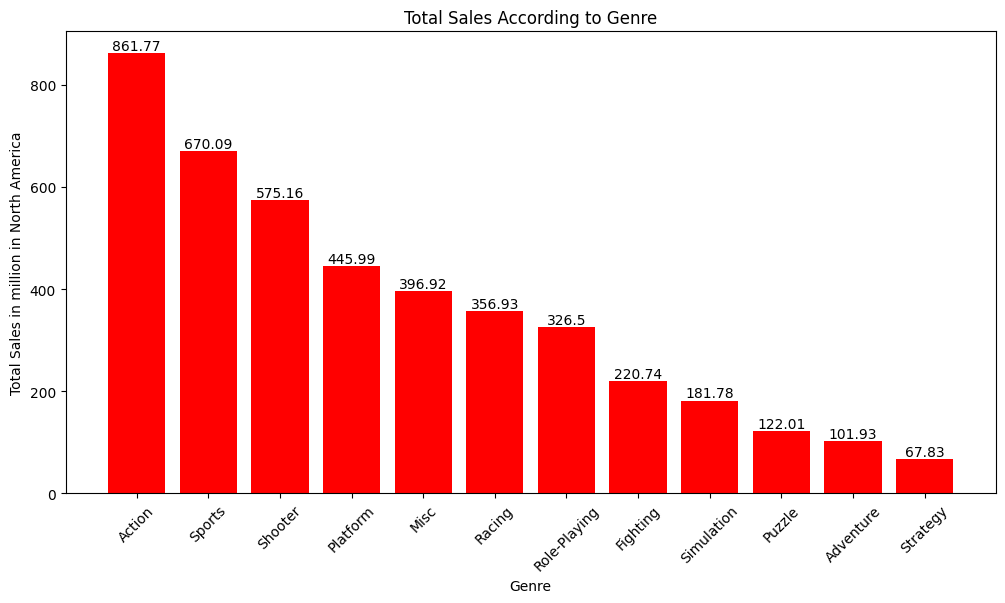

In [68]:
grouped_df= df.groupby(['genre'],as_index=False)['na_sales'].sum().sort_values(by='na_sales',ascending=False)
plt.figure(figsize=(12,6))
bars=plt.bar(grouped_df['genre'], grouped_df['na_sales'],color='red')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom')

plt.title('Total Sales According to Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales in million in North America')
plt.xticks(rotation=45)
plt.show()

In [12]:
df.groupby(['genre'],as_index=False)['na_sales'].sum().sort_values(by='na_sales',ascending=False)

,genre,na_sales
0,Action,861.77
10,Sports,670.09
8,Shooter,575.16
4,Platform,445.99
3,Misc,396.92
6,Racing,356.93
7,Role-Playing,326.50
2,Fighting,220.74
9,Simulation,181.78
5,Puzzle,122.01


#### Platform

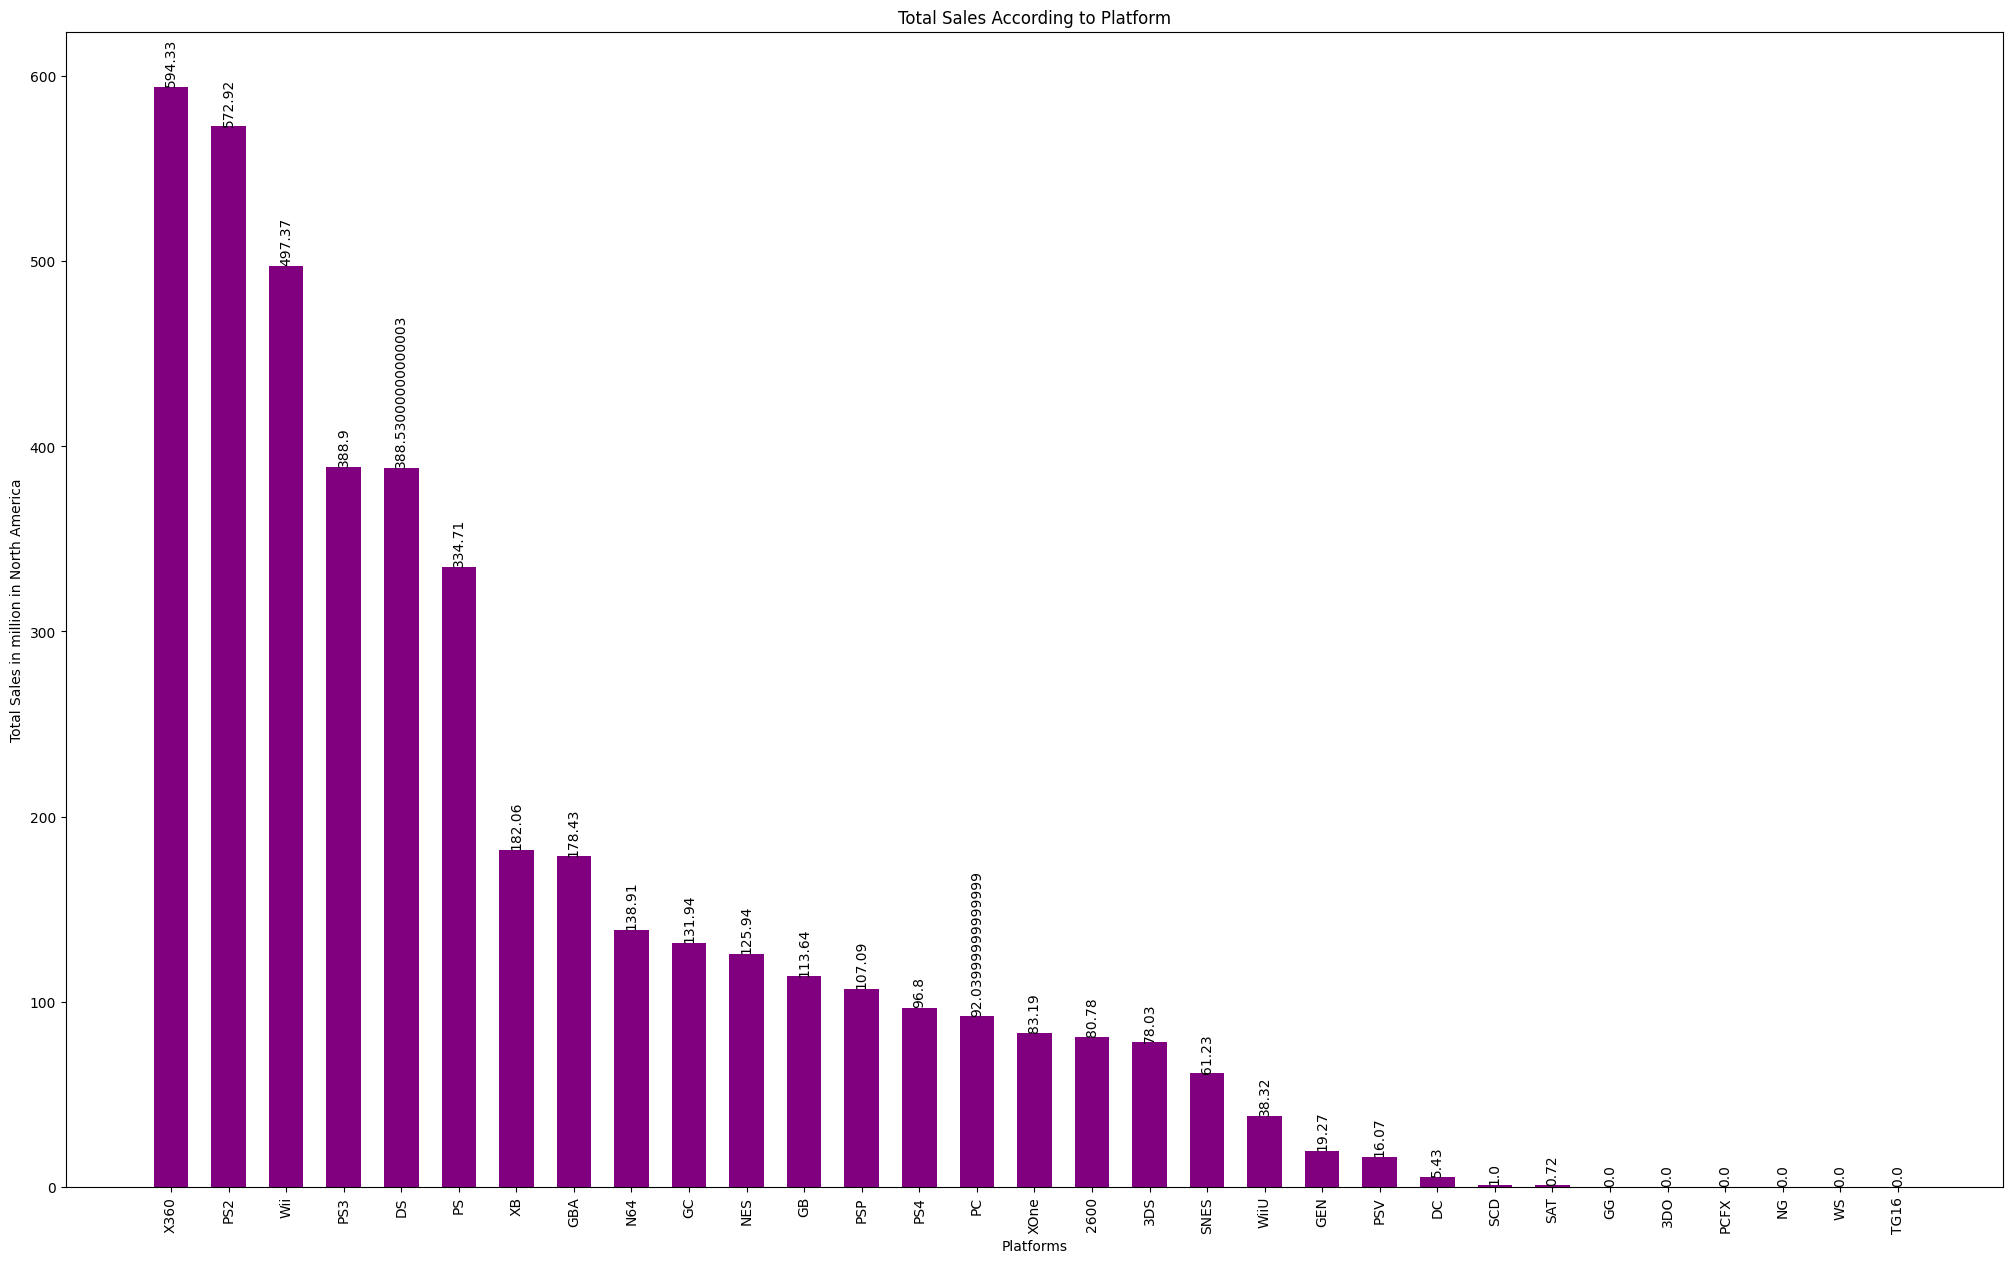

In [67]:
platform = df.groupby(['platform'],as_index=False)['na_sales'].sum().sort_values(by='na_sales',ascending=False)
plt.figure(figsize=(25,15))
bars=plt.bar(platform['platform'],platform['na_sales'],width=0.6,color='purple')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom',rotation=90)
plt.title('Total Sales According to Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales in million in North America')
plt.xticks(rotation=90)
plt.show()


In [14]:
df.groupby(['platform'],as_index=False)['na_sales'].sum().sort_values(by='na_sales',ascending=False)

,platform,na_sales
28,X360,594.33
16,PS2,572.92
26,Wii,497.37
17,PS3,388.90
4,DS,388.53
15,PS,334.71
29,XB,182.06
6,GBA,178.43
10,N64,138.91
7,GC,131.94


#### Top 10 Publishers According to Sale in North America

In [15]:
top=df.groupby(['publisher'],as_index=False)['na_sales'].sum().sort_values(by='na_sales',ascending=False)
top.head(10)

,publisher,na_sales
359,Nintendo,815.75
138,Electronic Arts,584.22
21,Activision,426.01
455,Sony Computer Entertainment,265.22
524,Ubisoft,252.81
493,Take-Two Interactive,220.47
487,THQ,208.60
323,Microsoft Game Studios,155.35
445,Sega,108.78
53,Atari,101.23


#### Total Sales by Year 

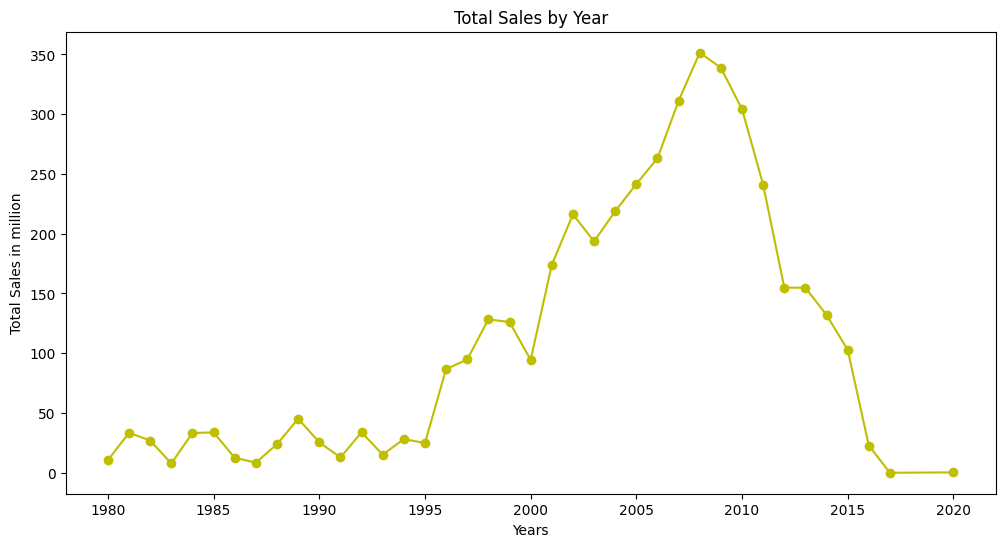

In [64]:
plot=df.groupby(['year'],as_index=False)['na_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(plot['year'],plot['na_sales'],marker='o',c='y')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales in million')
plt.xlabel("Years")
plt.show()

### **Europe Sales**

#### Genre

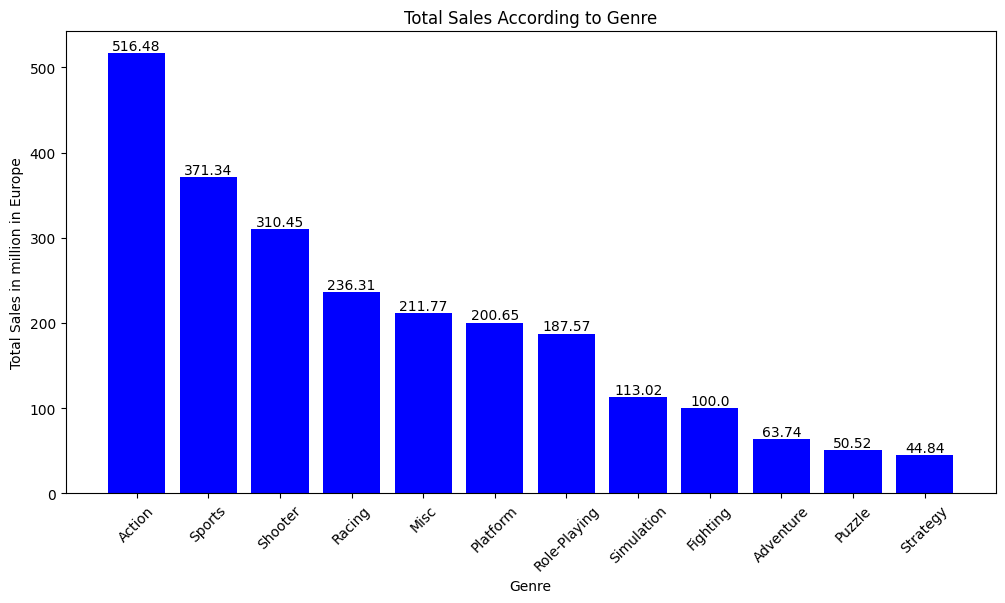

In [63]:
grouped_df= df.groupby(['genre'],as_index=False)['eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
plt.figure(figsize=(12,6))
bars=plt.bar(grouped_df['genre'], grouped_df['eu_sales'],color='blue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom')
plt.title('Total Sales According to Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales in million in Europe')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.groupby(['genre'],as_index=False)['eu_sales'].sum().sort_values(by='eu_sales',ascending=False)

,genre,eu_sales
0,Action,516.48
10,Sports,371.34
8,Shooter,310.45
6,Racing,236.31
3,Misc,211.77
4,Platform,200.65
7,Role-Playing,187.57
9,Simulation,113.02
2,Fighting,100.00
1,Adventure,63.74


#### Platform

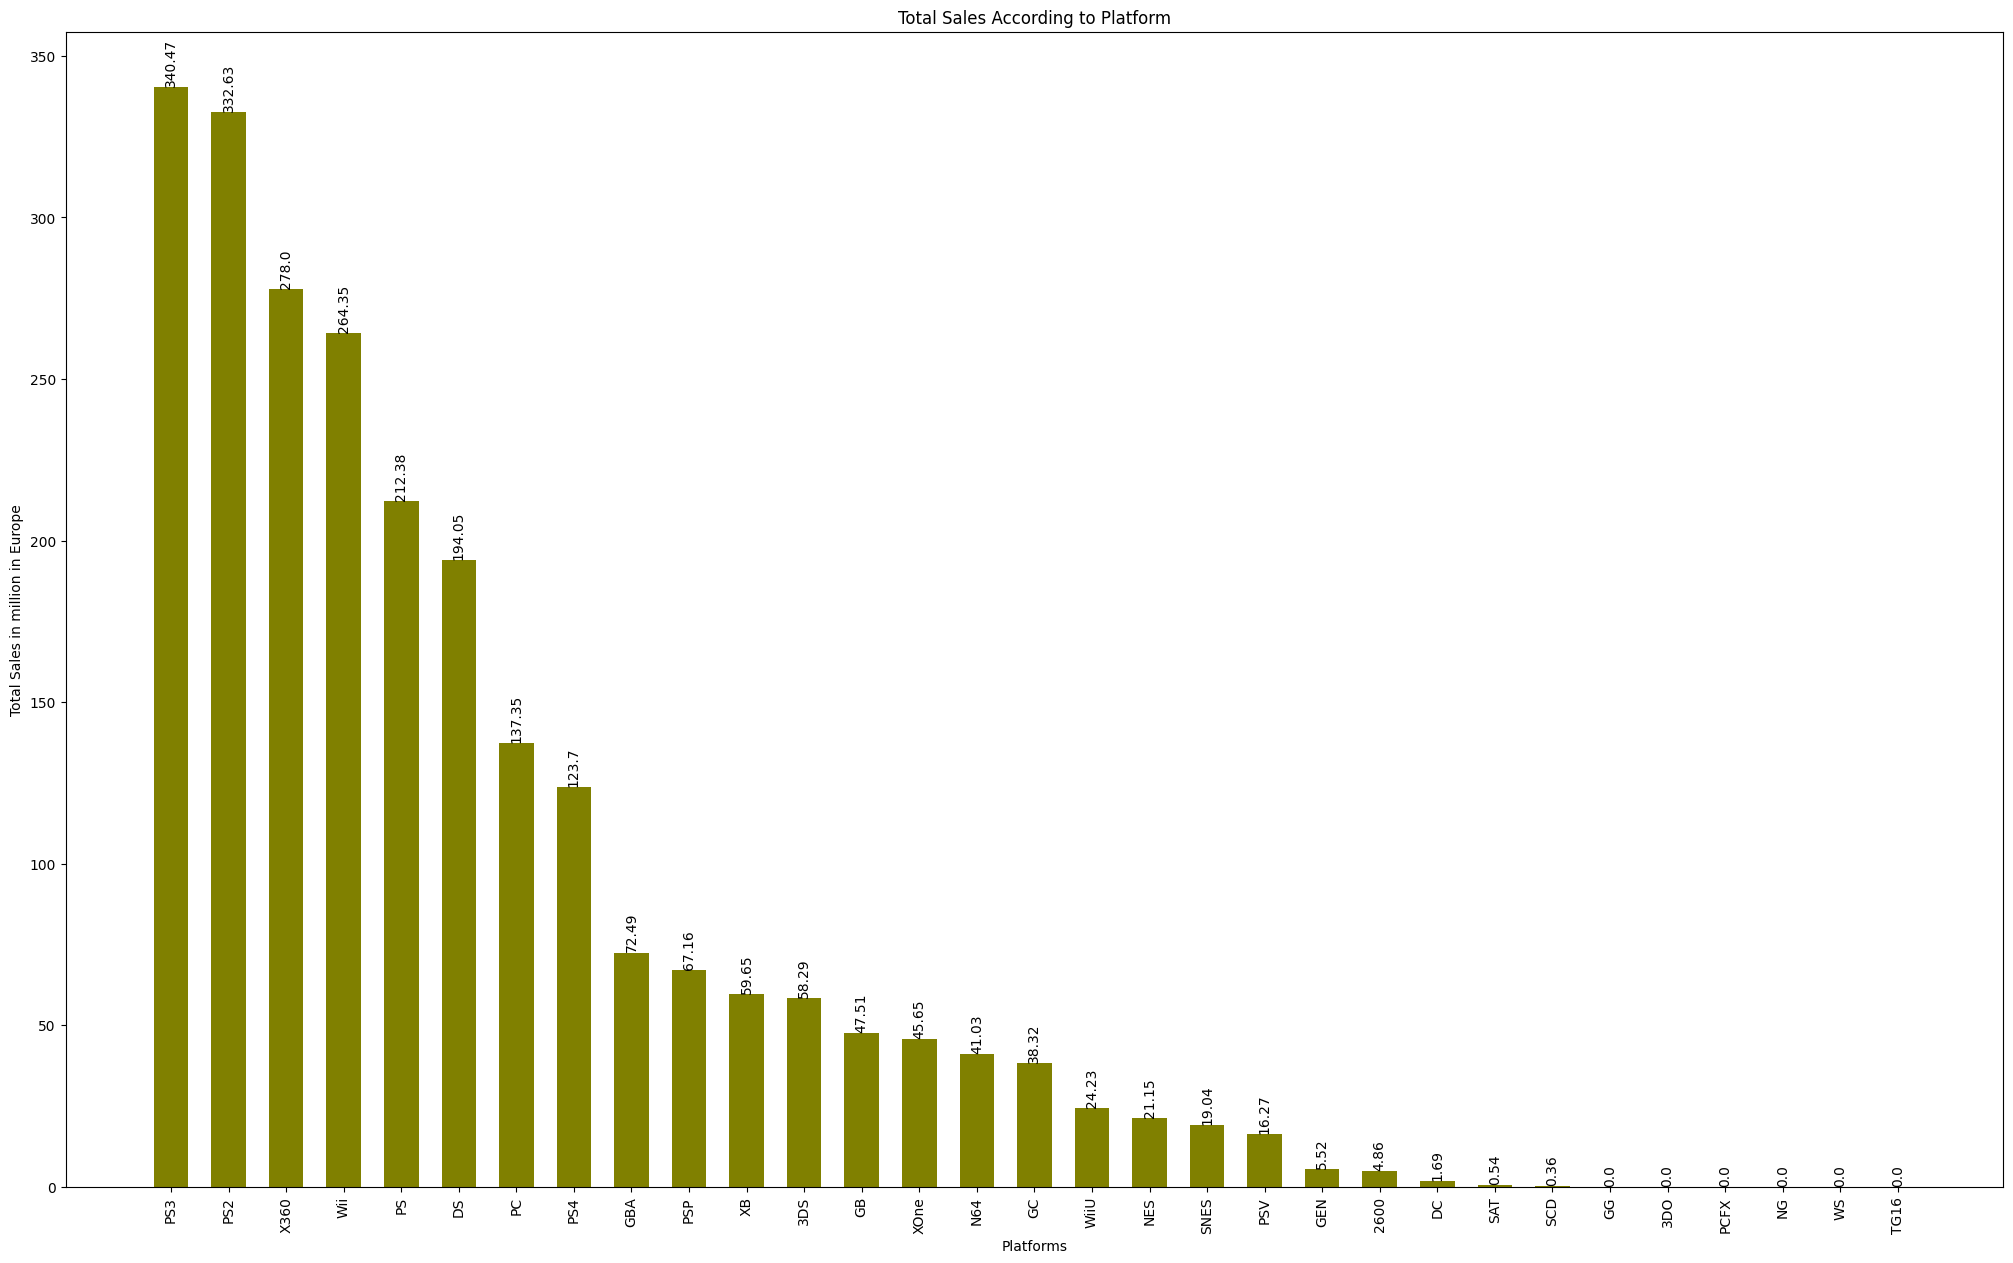

In [62]:
platform = df.groupby(['platform'],as_index=False)['eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
plt.figure(figsize=(25,15))
bars=plt.bar(platform['platform'],platform['eu_sales'],width=0.6,color='olive')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom',rotation=90)
plt.title('Total Sales According to Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales in million in Europe')
plt.xticks(rotation=90)
plt.show()


In [20]:
df.groupby(['platform'],as_index=False)['eu_sales'].sum().sort_values(by='eu_sales',ascending=False)

,platform,eu_sales
17,PS3,340.47
16,PS2,332.63
28,X360,278.00
26,Wii,264.35
15,PS,212.38
4,DS,194.05
13,PC,137.35
18,PS4,123.70
6,GBA,72.49
19,PSP,67.16


#### Top 10 Publishers According to Sale in Europe

In [21]:
top=df.groupby(['publisher'],as_index=False)['eu_sales'].sum().sort_values(by='eu_sales',ascending=False)
top.head(10)

,publisher,eu_sales
359,Nintendo,418.30
138,Electronic Arts,367.38
21,Activision,213.72
455,Sony Computer Entertainment,187.55
524,Ubisoft,163.03
493,Take-Two Interactive,117.95
487,THQ,94.60
445,Sega,81.41
275,Konami Digital Entertainment,68.62
323,Microsoft Game Studios,68.61


#### Sales by Year 

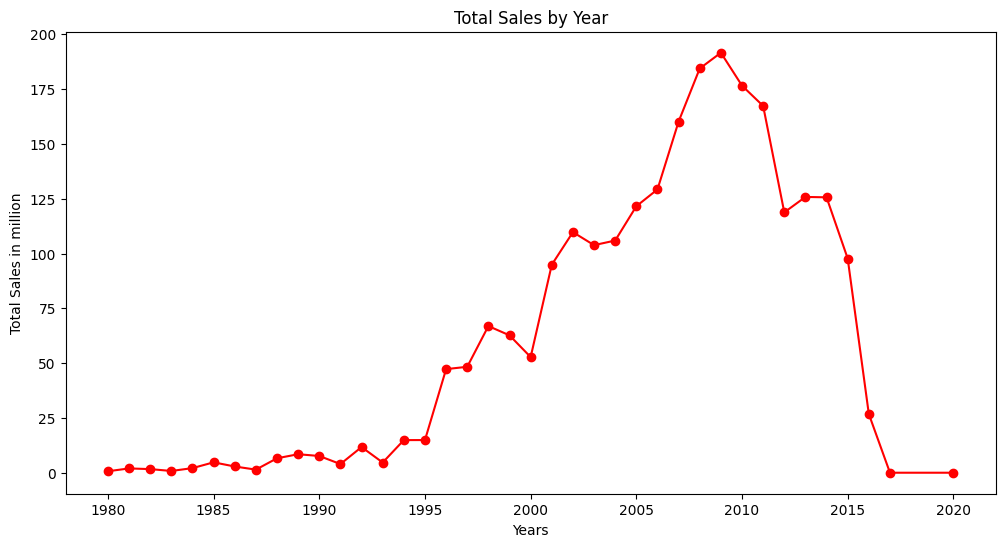

In [61]:
plot=df.groupby(['year'],as_index=False)['eu_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(plot['year'],plot['eu_sales'],marker='o',c='r')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales in million')
plt.xlabel("Years")
plt.show()

### **Asia Sales**

#### Genre

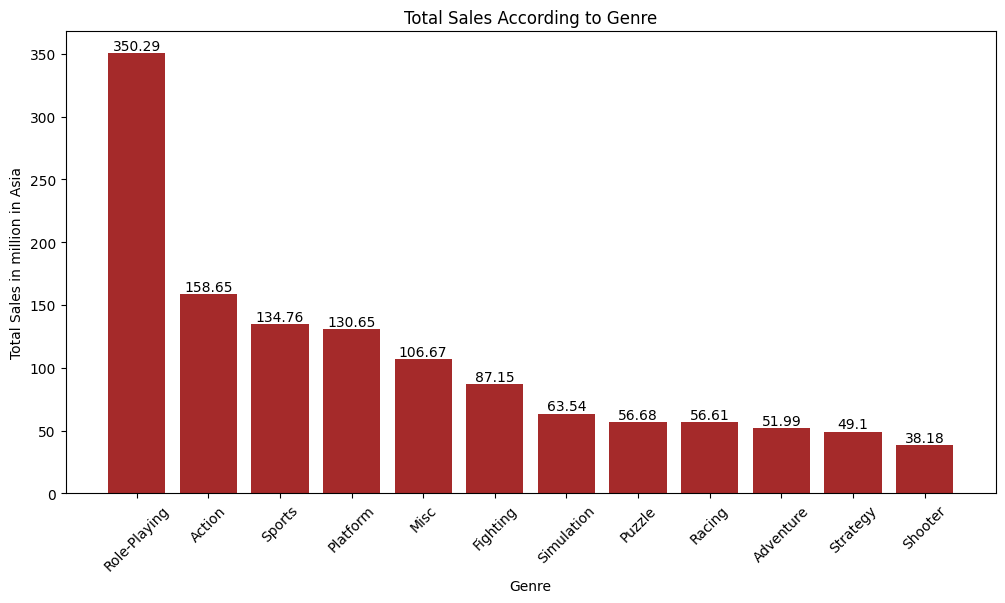

In [71]:
grouped_df= df.groupby(['genre'],as_index=False)['as_sales'].sum().sort_values(by='as_sales',ascending=False)
plt.figure(figsize=(12,6))
bars=plt.bar(grouped_df['genre'], grouped_df['as_sales'],color='brown')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom')
plt.title('Total Sales According to Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales in million in Asia')
plt.xticks(rotation=45)
plt.show()

In [24]:
df.groupby(['genre'],as_index=False)['as_sales'].sum().sort_values(by='as_sales',ascending=False)

,genre,as_sales
7,Role-Playing,350.29
0,Action,158.65
10,Sports,134.76
4,Platform,130.65
3,Misc,106.67
2,Fighting,87.15
9,Simulation,63.54
5,Puzzle,56.68
6,Racing,56.61
1,Adventure,51.99


### Platform

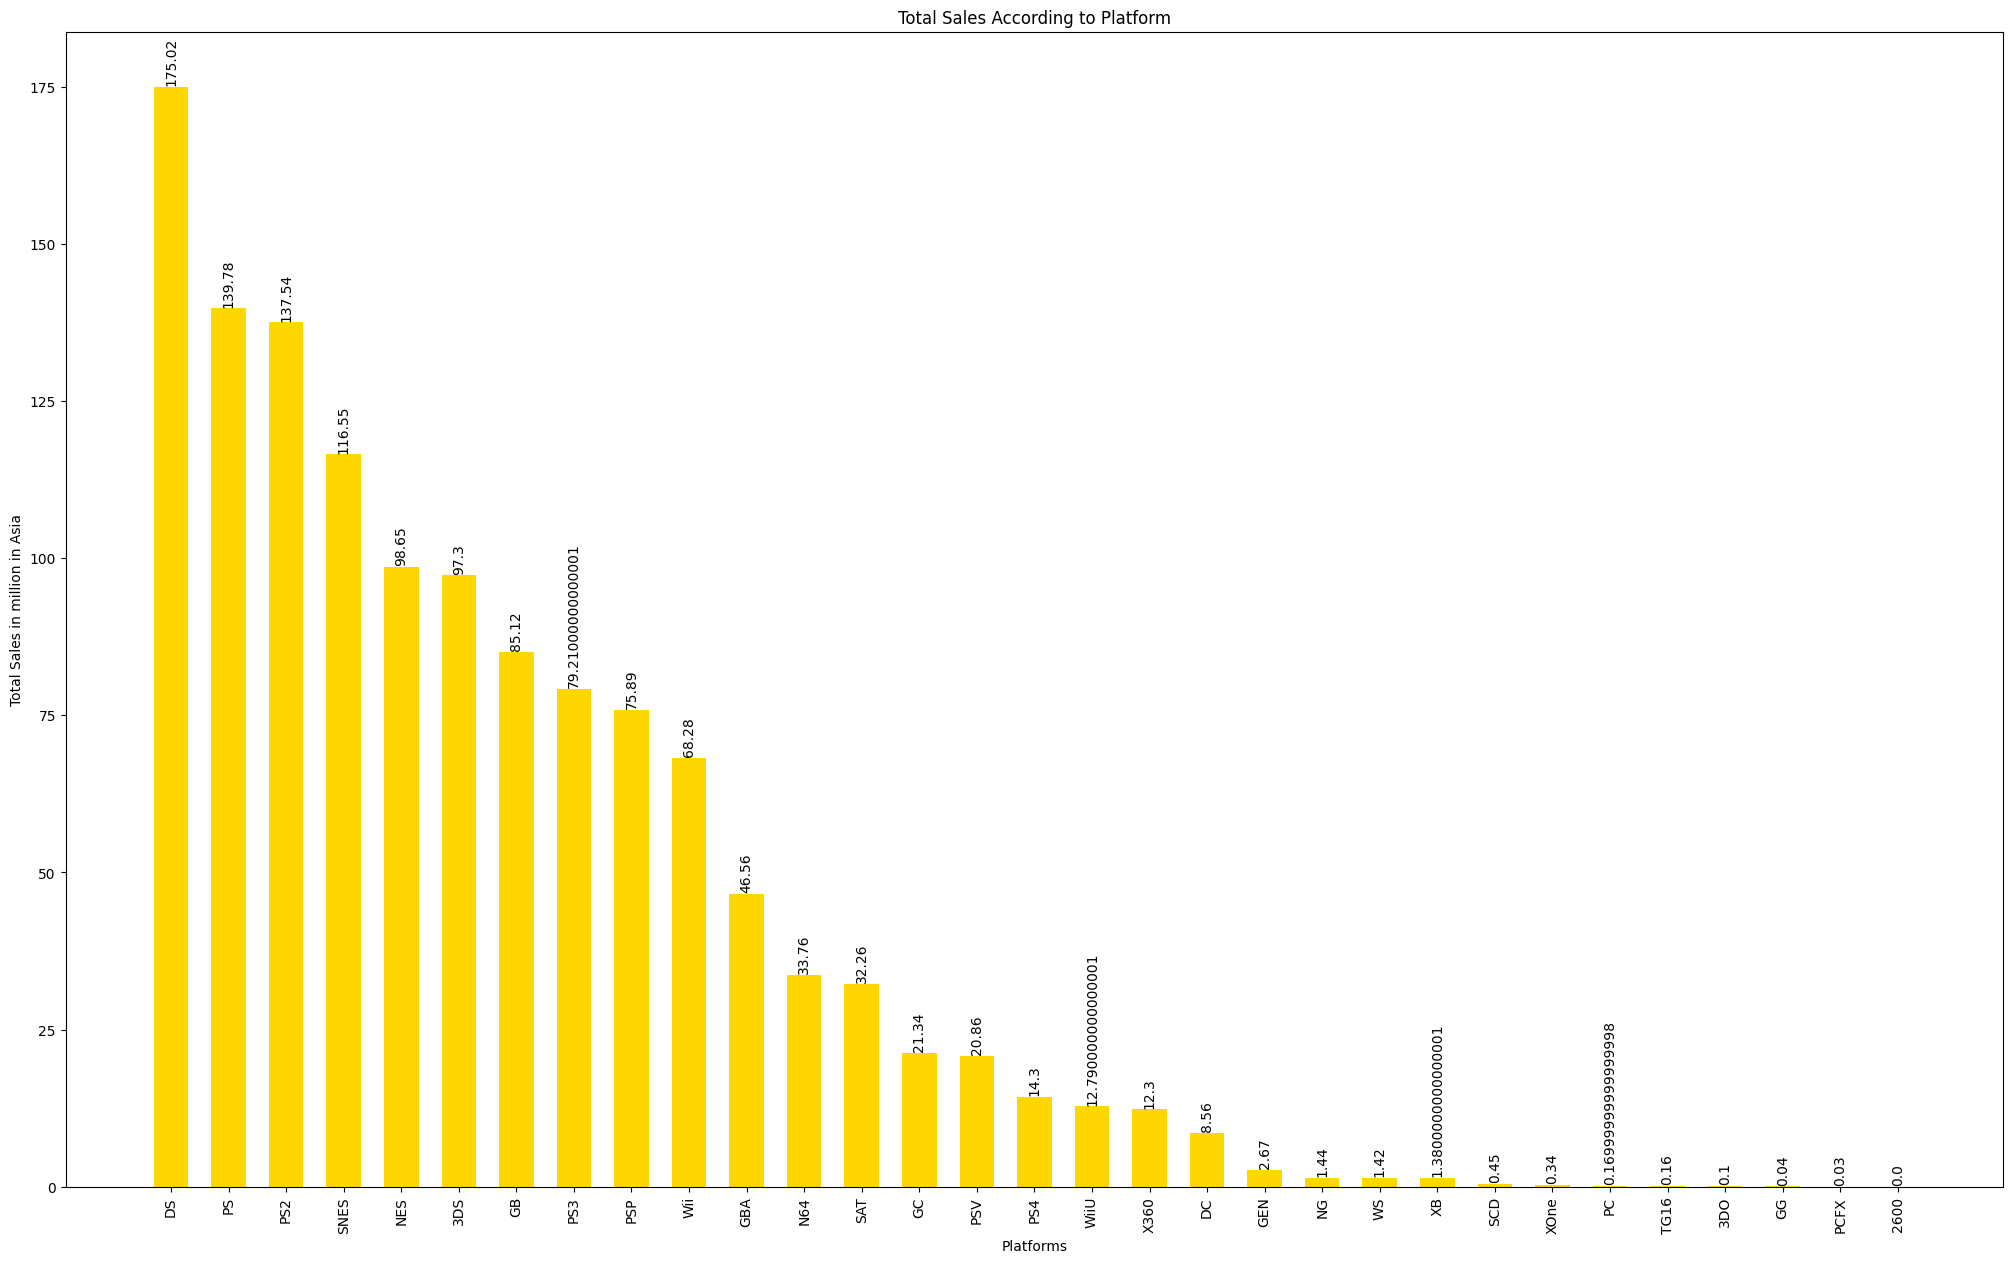

In [58]:
platform = df.groupby(['platform'],as_index=False)['as_sales'].sum().sort_values(by='as_sales',ascending=False)
plt.figure(figsize=(25,15))
bars=plt.bar(platform['platform'],platform['as_sales'],width=0.6,color='gold')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom',rotation=90)
plt.title('Total Sales According to Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales in million in Asia')
plt.xticks(rotation=90)
plt.show()


In [26]:
df.groupby(['platform'],as_index=False)['as_sales'].sum().sort_values(by='as_sales',ascending=False)

,platform,as_sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
11,NES,98.65
2,3DS,97.30
5,GB,85.12
17,PS3,79.21
19,PSP,75.89
26,Wii,68.28


#### Top 10 Publishers According to Sale in Asia

In [27]:
top=df.groupby(['publisher'],as_index=False)['as_sales'].sum().sort_values(by='as_sales',ascending=False)
top.head(10)

,publisher,as_sales
359,Nintendo,454.99
347,Namco Bandai Games,126.84
275,Konami Digital Entertainment,90.93
455,Sony Computer Entertainment,74.10
85,Capcom,67.38
445,Sega,56.19
464,Square Enix,49.79
465,SquareSoft,40.13
144,Enix Corporation,32.40
499,Tecmo Koei,29.21


#### Sales by Year 

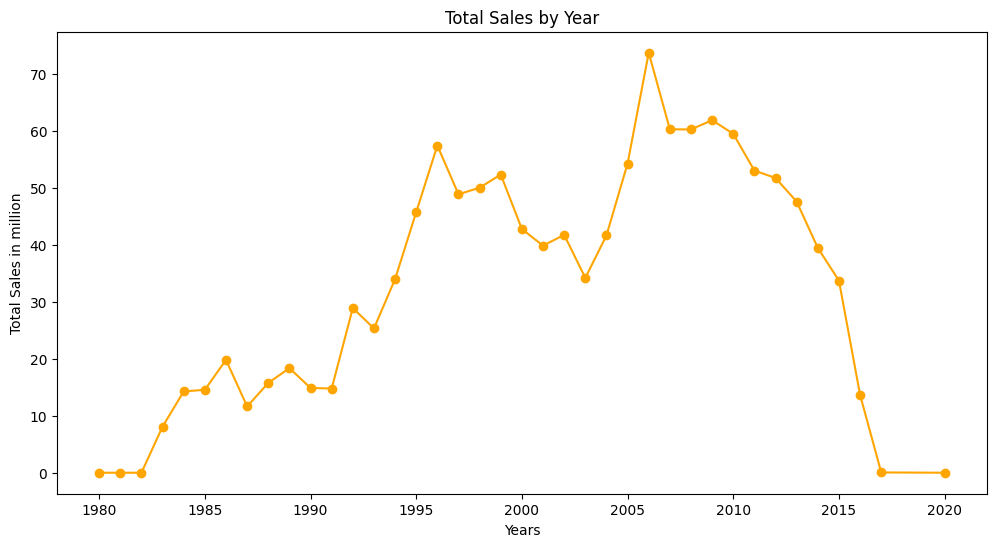

In [57]:
plot=df.groupby(['year'],as_index=False)['as_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(plot['year'],plot['as_sales'],marker='o',c='orange')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales in million')
plt.xlabel("Years")
plt.show()

### **Others Sales**

#### Genre

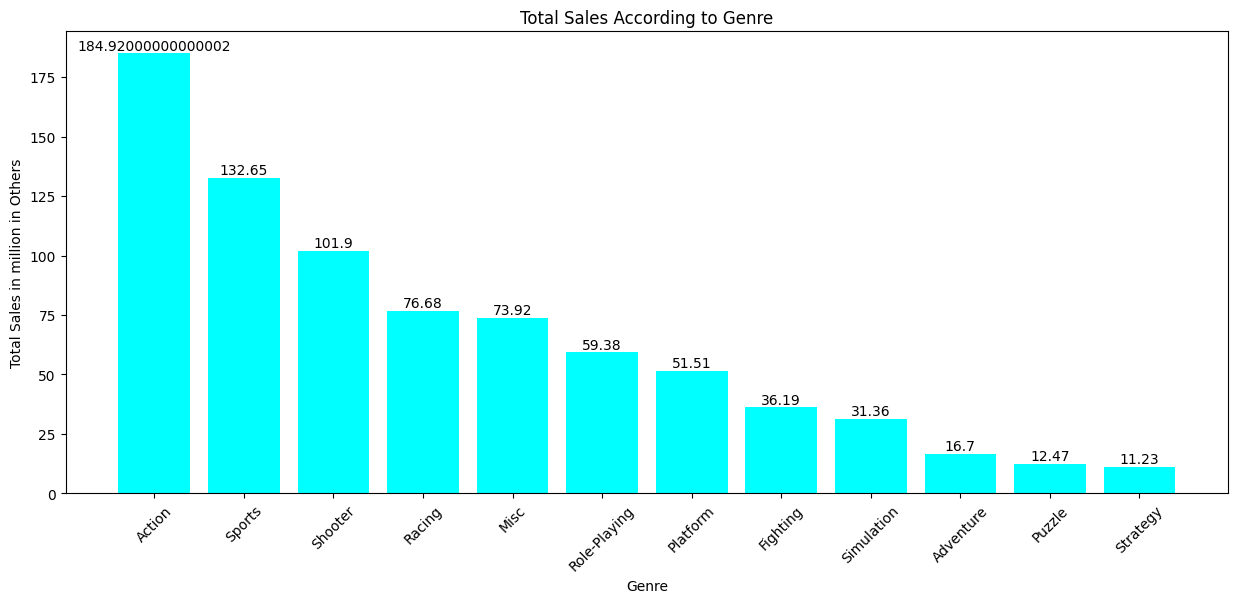

In [55]:
grouped_df= df.groupby(['genre'],as_index=False)['other_sales'].sum().sort_values(by='other_sales',ascending=False)
plt.figure(figsize=(15,6))
bars=plt.bar(grouped_df['genre'], grouped_df['other_sales'],color='cyan')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom')
plt.title('Total Sales According to Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales in million in Others')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.groupby(['genre'],as_index=False)['other_sales'].sum().sort_values(by='other_sales',ascending=False)

,genre,other_sales
0,Action,184.92
10,Sports,132.65
8,Shooter,101.90
6,Racing,76.68
3,Misc,73.92
7,Role-Playing,59.38
4,Platform,51.51
2,Fighting,36.19
9,Simulation,31.36
1,Adventure,16.70


#### Platform

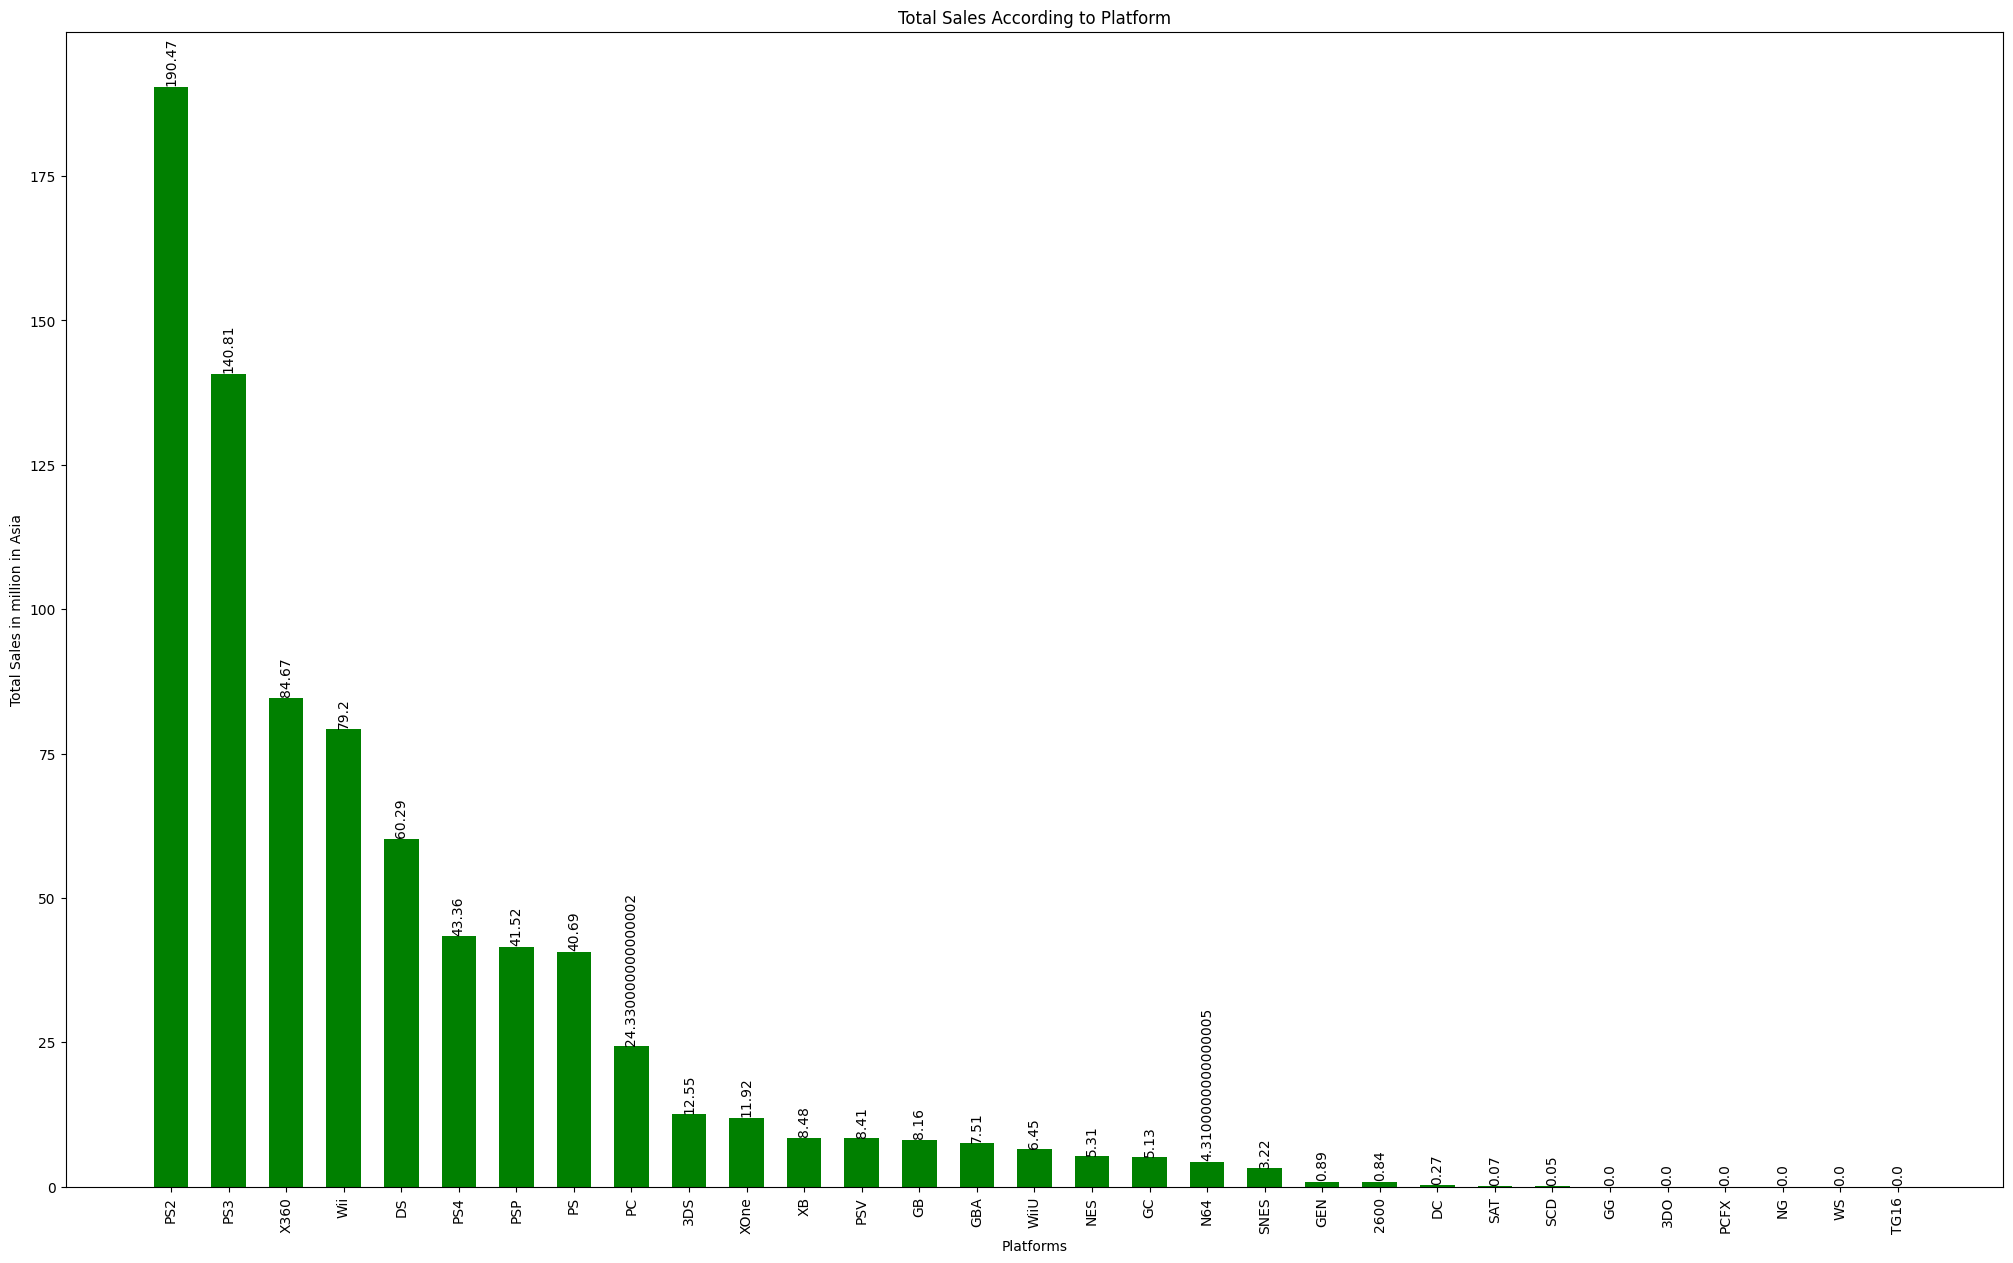

In [54]:
platform = df.groupby(['platform'],as_index=False)['other_sales'].sum().sort_values(by='other_sales',ascending=False)
plt.figure(figsize=(25,15))
bars=plt.bar(platform['platform'],platform['other_sales'],width=0.6,color='green')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, 
             f'{height}', 
             ha='center',va='bottom',rotation=90)
plt.title('Total Sales According to Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales in million in Asia')
plt.xticks(rotation=90)
plt.show()

In [32]:
df.groupby(['platform'],as_index=False)['other_sales'].sum().sort_values(by='other_sales',ascending=False)

,platform,other_sales
16,PS2,190.47
17,PS3,140.81
28,X360,84.67
26,Wii,79.20
4,DS,60.29
18,PS4,43.36
19,PSP,41.52
15,PS,40.69
13,PC,24.33
2,3DS,12.55


#### Top 10 Publishers According to Sale in Others

In [33]:
top=df.groupby(['publisher'],as_index=False)['other_sales'].sum().sort_values(by='other_sales',ascending=False)
top.head(10)

,publisher,other_sales
138,Electronic Arts,127.63
359,Nintendo,95.19
455,Sony Computer Entertainment,80.40
21,Activision,74.79
493,Take-Two Interactive,55.20
524,Ubisoft,50.16
487,THQ,32.11
275,Konami Digital Entertainment,29.91
445,Sega,24.30
323,Microsoft Game Studios,18.56


#### Number of Release by Year 

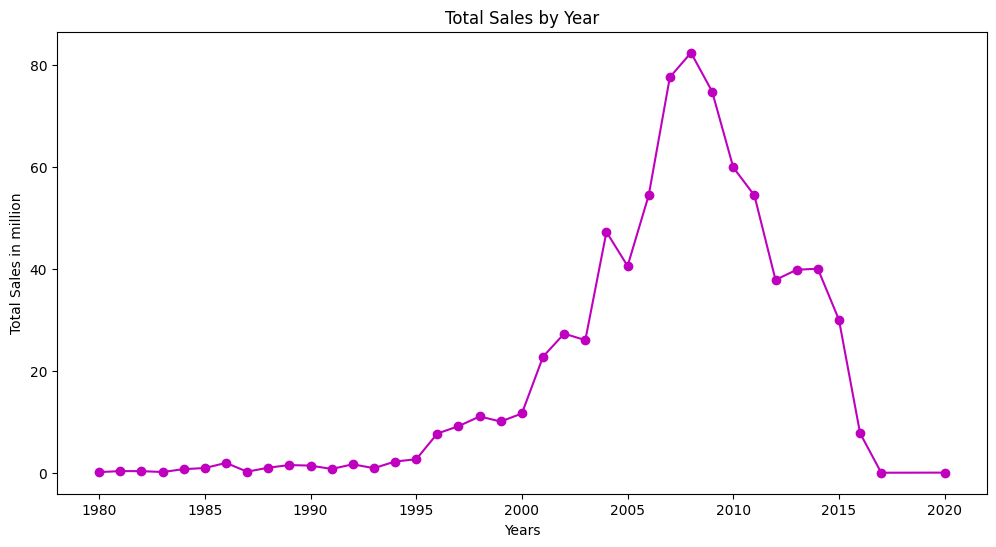

In [51]:
plot=df.groupby(['year'],as_index=False)['other_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(plot['year'],plot['other_sales'],marker='o',c='m')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales in million')
plt.xlabel("Years")
plt.show()